In [2]:
from selenium  import webdriver
from selenium.webdriver.firefox.service import Service as firefoxService
from selenium.webdriver.common.by import By
from webdriver_manager.firefox import GeckoDriverManager 
import requests
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import numpy as np
from collections import defaultdict
import time
import datetime 
import matplotlib.pyplot as plt
import matplotlib as mpl
import arabic_reshaper
from bidi.algorithm import get_display


In [16]:

class Divar_ad:
    wait_time=1
    
    
    def _divar_number_convertor(self,divar_number=""):
        if divar_number =="همکف":
            return 0
        divar_number.replace("٬", "")
        persian_digit={
            "٬":"",
            "،":"",
            "۱":"1",
            "۲":"2",
            "۳":"3",
            "۴":"4",
            "۵":"5",
            "۶":"6",
            "۷":"7",
            "۸": "8",
            "۹":"9",
            "۰": "0",  
        }
        
        for i in persian_digit.items():
            divar_number=divar_number.replace (i[0], i[1])
        try:
            divar_number=int(divar_number)
            return (divar_number)
        except:
            return None
        
    def _divar_location_convertor(self,divar_location:str):
        pass
    
    def _divar_date_convertor (self,divar_date:str) :  
        time_dict={"لحظاتی پیش":datetime.timedelta(seconds=30),"دقایقی پیش":datetime.timedelta(minutes=5)
                ,"ربع پیش":datetime.timedelta(minutes=15)
                ,"نیم ساعت":datetime.timedelta(minutes=30)
                ,"۱ ساعت پیش":datetime.timedelta(hours=1)
                ,"۲ ساعت پیش":datetime.timedelta(hours=2)
                ,"۳ ساعت پیش":datetime.timedelta(hours=3)
                ,"۴ ساعت پیش":datetime.timedelta(hours=4)
                ,"۵ ساعت پیش":datetime.timedelta(hours=5)
                ,"۶ ساعت پیش":datetime.timedelta(hours=6)
                ,"۷ ساعت پیش":datetime.timedelta(hours=7)
                ,"۸ ساعت پیش":datetime.timedelta(hours=8)
                ,"۹ ساعت پیش":datetime.timedelta(hours=9)
                ,"۱۰ ساعت پیش":datetime.timedelta(hours=10)
                ,"۱۱ ساعت پیش":datetime.timedelta(hours=11)
                ,"۱۲ ساعت پیش":datetime.timedelta(hours=12)
                ,"۱۳ ساعت پیش":datetime.timedelta(hours=13)
                ,"۱۴ ساعت پیش":datetime.timedelta(hours=14)
                ,"۱۵ ساعت پیش":datetime.timedelta(hours=15)
                ,"۱۶ ساعت پیش":datetime.timedelta(hours=16)
                ,"۱۷ ساعت پیش":datetime.timedelta(hours=17)
                ,"۱۸ ساعت پیش":datetime.timedelta(hours=18)
                ,"۱۹ ساعت پیش":datetime.timedelta(hours=19)
                ,"۲۰ ساعت پیش":datetime.timedelta(hours=20)
                ,"۲۱ ساعت پیش":datetime.timedelta(hours=21)
                ,"۲۲ ساعت پیش":datetime.timedelta(hours=22)
                ,"۲۳ ساعت پیش":datetime.timedelta(hours=23)
                ,"۱ روز پیش":datetime.timedelta(days=1,
                                                hours=datetime.datetime.now().hour , 
                                                minutes=datetime.datetime.now().minute,
                                                seconds=datetime.datetime.now().second,
                                                microseconds=datetime.datetime.now().microsecond)
                ,"۲ روز پیش":datetime.timedelta(days=2,hours=datetime.datetime.now().hour , 
                                                minutes=datetime.datetime.now().minute,
                                                seconds=datetime.datetime.now().second,
                                                microseconds=datetime.datetime.now().microsecond)
                ,"۳ روز پیش":datetime.timedelta(days=3,hours=datetime.datetime.now().hour , 
                                                minutes=datetime.datetime.now().minute,
                                                seconds=datetime.datetime.now().second,
                                                microseconds=datetime.datetime.now().microsecond)
                ,"۴ روز پیش":datetime.timedelta(days=4,hours=datetime.datetime.now().hour , 
                                                minutes=datetime.datetime.now().minute,
                                                seconds=datetime.datetime.now().second,
                                                microseconds=datetime.datetime.now().microsecond)
                ,"۵ روز پیش":datetime.timedelta(days=5,hours=datetime.datetime.now().hour , 
                                                minutes=datetime.datetime.now().minute,
                                                seconds=datetime.datetime.now().second,
                                                microseconds=datetime.datetime.now().microsecond)
                ,"۶ روز پیش":datetime.timedelta(days=6,hours=datetime.datetime.now().hour , 
                                                minutes=datetime.datetime.now().minute,
                                                seconds=datetime.datetime.now().second,
                                                microseconds=datetime.datetime.now().microsecond)
                ,"۱ هفته پیش":datetime.timedelta(days=7,hours=datetime.datetime.now().hour , 
                                                minutes=datetime.datetime.now().minute,
                                                seconds=datetime.datetime.now().second,
                                                microseconds=datetime.datetime.now().microsecond)
                ,"۲ هفته پیش":datetime.timedelta(days=14,hours=datetime.datetime.now().hour , 
                                                minutes=datetime.datetime.now().minute,
                                                seconds=datetime.datetime.now().second,
                                                microseconds=datetime.datetime.now().microsecond)
                ,"۳ هفته پیش":datetime.timedelta(days=21,hours=datetime.datetime.now().hour , 
                                                minutes=datetime.datetime.now().minute,
                                                seconds=datetime.datetime.now().second,
                                                microseconds=datetime.datetime.now().microsecond)
                ,"۴ هفته پیش":datetime.timedelta(days=28,hours=datetime.datetime.now().hour , 
                                                minutes=datetime.datetime.now().minute,
                                                seconds=datetime.datetime.now().second,
                                                microseconds=datetime.datetime.now().microsecond)
                }
        for i in zip(time_dict,time_dict.values()):
            if divar_date.find(i[0]) != -1:
                return datetime.datetime.now() - i[1]
        return None

        
    def _location_creation_date_separator (self,l_d:str):
        t= l_d.strip().split ("،")   
        created_datetime=self._divar_date_convertor(t[0])
        location= t[1].strip()
        try :
            more_spec_location = t[2].strip()
        except :
            more_spec_location=None
            
        return location , created_datetime , more_spec_location
    
    def _divar_element_return(self,elm_path,by=By.XPATH,added_wait=0):
        element=WebDriverWait(self.driver,Divar_ad.wait_time+added_wait).until(EC.presence_of_element_located((by,elm_path ))) 
        return element       

    def _divar_subElement_return(self,upper_elm,elm_path,by=By.XPATH,added_wait=0):
        element=WebDriverWait(upper_elm,Divar_ad.wait_time+added_wait).until(EC.presence_of_element_located((by,elm_path ))) 
        return element       

    def _divar_group_elements_return(self, elm_path,by=By.XPATH, added_wait=0):
        elements=WebDriverWait(self.driver,Divar_ad.wait_time+added_wait).until(EC.presence_of_all_elements_located((by,elm_path ))) 
        return elements

    def __init__(self,driver , ad_link: str):
        self.title=None
        self.location=None
        self.created_datetime=None
        self.more_spec_location=None
        self.description=None
        self.has_image    =None
        self.ad_link=None
    
        self.driver = driver
        for j in range(5):
            try:
                self.driver.get(ad_link)
                self.ad_link=self.driver.current_url
                self. title= self._divar_element_return("//div[@class ='kt-page-title__texts']/div",added_wait=3 ).text
                
                    
                location_creation_date= self._divar_element_return("//div[@class ='kt-page-title__texts']/div[2]").text
                self.location , self.created_datetime, self.more_spec_location = self._location_creation_date_separator(location_creation_date)
                self.description= self._divar_element_return("//div [@class ='post-page__section--padded'][2]/div[2]").text
                try:
                    self.has_image = int(bool(self._divar_element_return("//div [@class = 'kt-carousel']")))
                except:
                    self.has_image = 0
                break
            except:
                time.sleep(3)
    def return_ad_details(self):
        items=defaultdict()
        items["title"]=self.title
        items["location"]=self.location
        items["created_datetime"]=self.created_datetime
        items["more_spec_location"]=self.more_spec_location
        items["description"]=self.description
        items["has_image"]=self.has_image
        return items
      
class Divar_ad_sell_apartment(Divar_ad):
    
    def _divar_construct_date_convertor(self, date):
        if "قبل از" in date:
            return 1369
        else:
            return self._divar_number_convertor(date)
    def _divar_room_number_convertor(self, room_number):
        if "بدون اتاق" in room_number:
            return 0
        elif "+" in room_number:
            return  5
        else:
            return self._divar_number_convertor(room_number)
    
    def _divar_spec_finder(self, specs):
        def _vr(value):
            self.has_vr=int(bool(value))
        def _full_price(value):
            if "توافقی" in value:
                self.full_price , self.PPSM = -1 , -1
            else:
                self.full_price= self._divar_number_convertor(value.split ("تومان")[0])
        def _PPSM_price(value):
            self.PPSM= self._divar_number_convertor(value.split ("تومان")[0])
        def _owner(value)  :
            self.ad_owner=value
        def _floor (value):
            def _floor_describtion(value):
                if "زیرهمکف" in value:
                    floor_number=-1
                elif "همکف" in value:
                    floor_number=0
                else:
                    floor_number=self._divar_number_convertor(value)
                return floor_number
            if "از" in value:
                
                self.floor_number, self.building_height = _floor_describtion( value.split("از")[0] ),self._divar_number_convertor( value.split("از")[1])
                
            else:
                self.floor_number, self.building_height = _floor_describtion(value) ,None
        
        spec_dict={"قیمت کل":_full_price, "قیمت هر متر":_PPSM_price,  "آژانس املاک":_owner, "طبقه":_floor, "آگهی‌دهنده":_owner,
                   "تور مجازی ۳۶۰ درجه":_vr }
        
        for spec in specs:
            spec_dict[self._divar_subElement_return(
                upper_elm=spec, elm_path=".//div").text](
                self._divar_subElement_return(upper_elm=spec,elm_path=".//div[2]").text)
            
            
    def _divar_row_1_finder(self, row_elements):
        self.construct_size=self._divar_number_convertor(row_elements[0].text)
        self.construct_date=self._divar_construct_date_convertor(row_elements[1].text)
        self.room_number = self._divar_room_number_convertor(row_elements[2].text)
   
    def _divar_row_2_finder(self , row_element):
        row_elements = row_element.find_elements(By.XPATH , ".//div/span") 
        self.has_elevator =(0 if "ندارد" in  row_elements[0].text else 1)
        self.has_parking=(0 if "ندارد" in    row_elements[1].text else 1)
        self.has_storeroom =(0 if "ندارد" in  row_elements[2].text else 1)
        # self.has_elevator =(0 if "ندارد" in  row_elements[0].find_element (By.XPATH, ".//span").text else 1)
        # self.has_parking=(0 if "ندارد" in  row_elements[1].find_element (By.XPATH, ".//span").text else 1)
        # self.has_storeroom =(0 if "ندارد" in  row_elements[2].find_element (By.XPATH, ".//span").text else 1)

    
    def  __init__(self,driver , ad_link: str):
        super().__init__(driver,ad_link) 
        self.has_vr    =0
        self.full_price=None
        self.PPSM=None
        self.ad_owner=None
        self.floor_number=None
        self.building_height=None
        
        self.construct_date=None
        self.construct_size=None
        self.room_number = None
        self.has_elevator =None
        self.has_parking=None
        self.has_storeroom =None
        for j in range (5):
            try:
                self._divar_row_1_finder( self._divar_group_elements_return("//div [@class = 'kt-group-row-item kt-group-row-item--info-row']/span[2]"))
                self._divar_spec_finder(self._divar_group_elements_return(".//div[@class ='kt-base-row kt-base-row--large kt-unexpandable-row']"))
                self._divar_row_2_finder(self._divar_element_return( "//div[@class ='kt-group-row'][2]" ))
                break
            except:
                time.sleep(3)
                
        # self._divar_row_2_finder(self._divar_group_elements_return("//div[@class ='kt-group-row'][2]"))
        
    
    def return_ad_details(self):
        items= super().return_ad_details()    
        items["building_height"]=self.building_height
        items["has_vr"]=self.has_vr    
        items["full_price"]=self.full_price
        items["PPSM"]=self.PPSM
        items["ad_owner"]=self.ad_owner
        items["floor_number"]=self.floor_number
        items["construct_date"]=self.construct_date
        items["construct_size"]=self.construct_size
        items["room_number"]=self.room_number
        items["has_elevator"]=self.has_elevator 
        items["has_parking"]=self.has_parking
        items["has_storeroom"]=self.has_storeroom 
        items['ad_link']=self.ad_link
        return items
        

In [17]:
class Divar_page:
    waiting_time =5
    def page_refresh():
        pass
    def __init__(self, page_url,driver):
        self.driver=driver
        self.driver.get(page_url)
    
    def extract_ad_url_until_page(self, max_page_numbers=10):
        
        current_page=1
        
        current_height=self.driver.execute_script("return document.body.scrollHeight")
        while current_page < max_page_numbers:   
            ad_links=[] 
            
            elements = WebDriverWait(self.driver, self.waiting_time).until (EC.presence_of_all_elements_located((By.XPATH,
                                                "//div[@class ='post-card-item-af972 kt-col-6-bee95 kt-col-xxl-4-e9d46']/a" )))
            ad_links.extend([element.get_attribute('href') for element in elements])
            
            
            self.driver.execute_script("window.scrollTo (0, document.body.scrollHeight);")
            time.sleep(1)                          
            new_height=self.driver.execute_script("return document.body.scrollHeight")
            if new_height==current_height:        
                
                break
            current_page+=1
            current_height=new_height
            yield ad_links , current_height
    def to_csv_ad_details_until_page(self,csv_file, batch_size=100, max_page=10)  :
        
        options2=webdriver.FirefoxOptions()
        options2.headless=True
        driver2=webdriver.Firefox(service=firefoxService (GeckoDriverManager().install()) , options=options2 )

        divar_ads=[]
        for urls,current_height in self.extract_ad_url_until_page(max_page_numbers=max_page):
            
            for url in urls:
                
                divar_ads.append( Divar_ad_sell_apartment(driver2,url))
            if len(divar_ads) % batch_size <5:
                old_df=pd.read_csv(csv_file)
                
                print (f"house 3 csv records ={len (old_df)}")
                for divar_ad in divar_ads:
                    new_df=pd.DataFrame(divar_ad.return_ad_details(),index=[0])
                    old_df=pd.concat((old_df,new_df),ignore_index=True) #list of dfs ?
                old_df.drop_duplicates(subset=["ad_link","PPSM"],inplace=True,keep="last")
                old_df.to_csv(csv_file, index=False)   
                divar_ads=[]
                
        else:
            old_df=pd.read_csv(csv_file)
            print (f"house 3 csv records ={len (old_df)}")
            for divar_ad in divar_ads:
                new_df=pd.DataFrame(divar_ad.return_ad_details(), index=[0])
                old_df=pd.concat((old_df,new_df),ignore_index=True) #list of dfs ?
            old_df.drop_duplicates(subset="ad_link")
            old_df.to_csv(csv_file, index=False)  
            print ("done!") 
        

In [18]:
options = webdriver.FirefoxOptions()
options.headless=False
driver = webdriver.Firefox(service= firefoxService(GeckoDriverManager().install()),options=options)

page=Divar_page(page_url="https://divar.ir/s/tehran/buy-apartment",driver=driver)
page.to_csv_ad_details_until_page('divar_house_3.csv',batch_size= 100,max_page= 500)


C:\Users\Thinkerman\AppData\Local\Temp\ipykernel_34920\3195181903.py:2: DeprecationWarning: headless property is deprecated, instead use add_argument('-headless')
  options.headless=False
[WDM] - Downloading: 16.9kB [00:00, 3.69MB/s]                   
[WDM] - Downloading: 16.9kB [00:00, 8.64MB/s]                   
[WDM] - Downloading: 100%|██████████| 1.59M/1.59M [00:01<00:00, 1.54MB/s]
C:\Users\Thinkerman\AppData\Local\Temp\ipykernel_34920\19255556.py:34: DeprecationWarning: headless property is deprecated, instead use add_argument('-headless')
  options2.headless=True
[WDM] - Downloading: 16.9kB [00:00, 5.77MB/s]                   


house 3 csv records =29948
house 3 csv records =30002
house 3 csv records =30071
house 3 csv records =30148
house 3 csv records =30214
house 3 csv records =30283
house 3 csv records =30351
house 3 csv records =30420
house 3 csv records =30489
house 3 csv records =30550
house 3 csv records =30620
house 3 csv records =30697
house 3 csv records =30758
house 3 csv records =30814
house 3 csv records =30883
house 3 csv records =30950
house 3 csv records =31021
house 3 csv records =31084
house 3 csv records =31151
house 3 csv records =31210
house 3 csv records =31282
house 3 csv records =31346
house 3 csv records =31416
house 3 csv records =31488
house 3 csv records =31531
house 3 csv records =31595
house 3 csv records =31673
house 3 csv records =31734
house 3 csv records =31824
house 3 csv records =31901


In [36]:
def strptime2(time,pattern):
    time = time.split(".")[0]
    x=datetime.datetime.strptime(time, pattern)
    
    return x
def per(text):
    return get_display(arabic_reshaper.reshape(f"{text}"))
def number_to_per(num:str):
    
    num=str(int (num))
    num_l=list(num)
    num_dict={
        "1":"۱"
        ,"2":"۲"
        ,"3":"۳"
        ,"4":"۴"
        ,"5":"۵"
        ,"6":"۶"
        ,"7":"۷"
        ,"8":"۸"
        ,"9":"۹"
        ,"0":"۰"
        ,",":"،"
    }
    per_num_l=[num_dict[i] for i in num_l]
    per_num = "".join(per_num_l)
    return per_num



In [39]:


df = pd. read_csv("divar_house_3.csv")


df=df.dropna(subset=["location"])
times=[i for i in  map(strptime2 , df["created_datetime"].dropna(),["%Y-%m-%d %H:%M:%S"]*len(df["created_datetime"].dropna()))]

indexs=[True if i>datetime.datetime.now()-datetime.timedelta(days=9) else False for i in times]
df=df[indexs]
df["location"]=df["location"].str.strip()
mpl.rc("figure", dpi=300)

lo=df["location"].value_counts()
lo.sort_values(ascending=False)
lo =lo[ lo>200]
lo= lo.to_dict()


C:\Users\Thinkerman\AppData\Local\Temp\ipykernel_14796\2265769819.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  t=ax.set_yticklabels([number_to_per(int(i)) for i in ax.get_yticks()])


Text(0.5, 1.0, 'ﻒﻠﺘﺨﻣ ﻖﻃﺎﻨﻣ ﺭﺩ ﮎﻼﻣﺍ ﯽﻬﮔﺁ ﺩﺪﻌﺗ ﺕﻭﺎﻔﺗ')

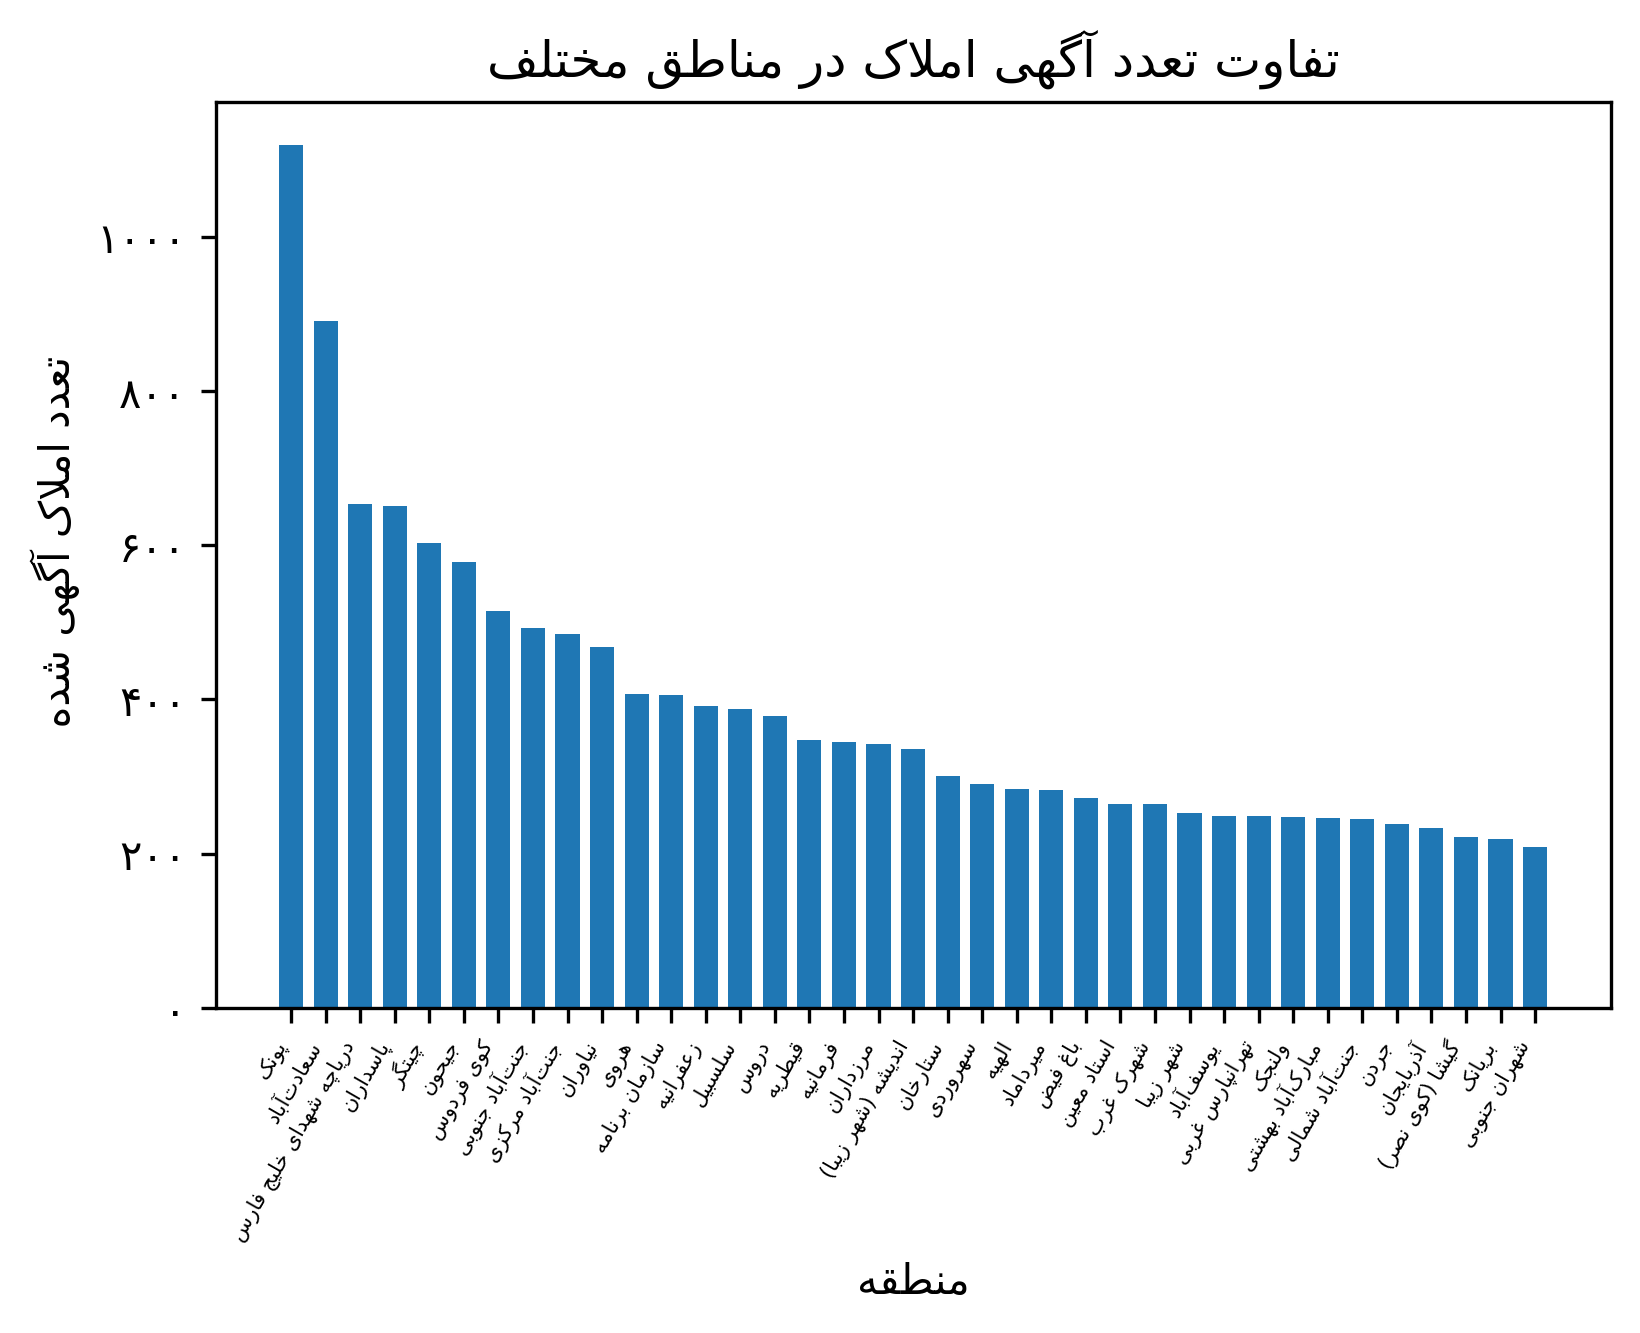

<Figure size 3000x900 with 0 Axes>

In [40]:
fig , ax  = plt.subplots()
x=[per(i) for i in list(lo.keys())]
height=list(lo.values())
ax.xaxis.set_tick_params(labelsize=5)
plt.figure(figsize=(10,3))
ax.set_xlabel(per("منطقه"))
ax.set_ylabel(per("تعدد املاک آگهی شده  "))

ax.bar(x=x,height=height ,align="center",width=0.7)
plt.setp (ax.get_xticklabels(), rotation=60, horizontalalignment='right')
t=ax.set_yticklabels([number_to_per(int(i)) for i in ax.get_yticks()])
ax.set_title(per("تفاوت تعدد آگهی املاک در مناطق مختلف"))
####


C:\Users\Thinkerman\AppData\Local\Temp\ipykernel_14796\2193349691.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  _=ax.set_yticklabels([number_to_per(int(i)) for i in ax.get_yticks()])


Text(0, 0.5, 'ﻩﺪﺷ ﯽﻬﮔﺁ ﮎﻼﻣﺍ ﺩﺪﻌﺗ')

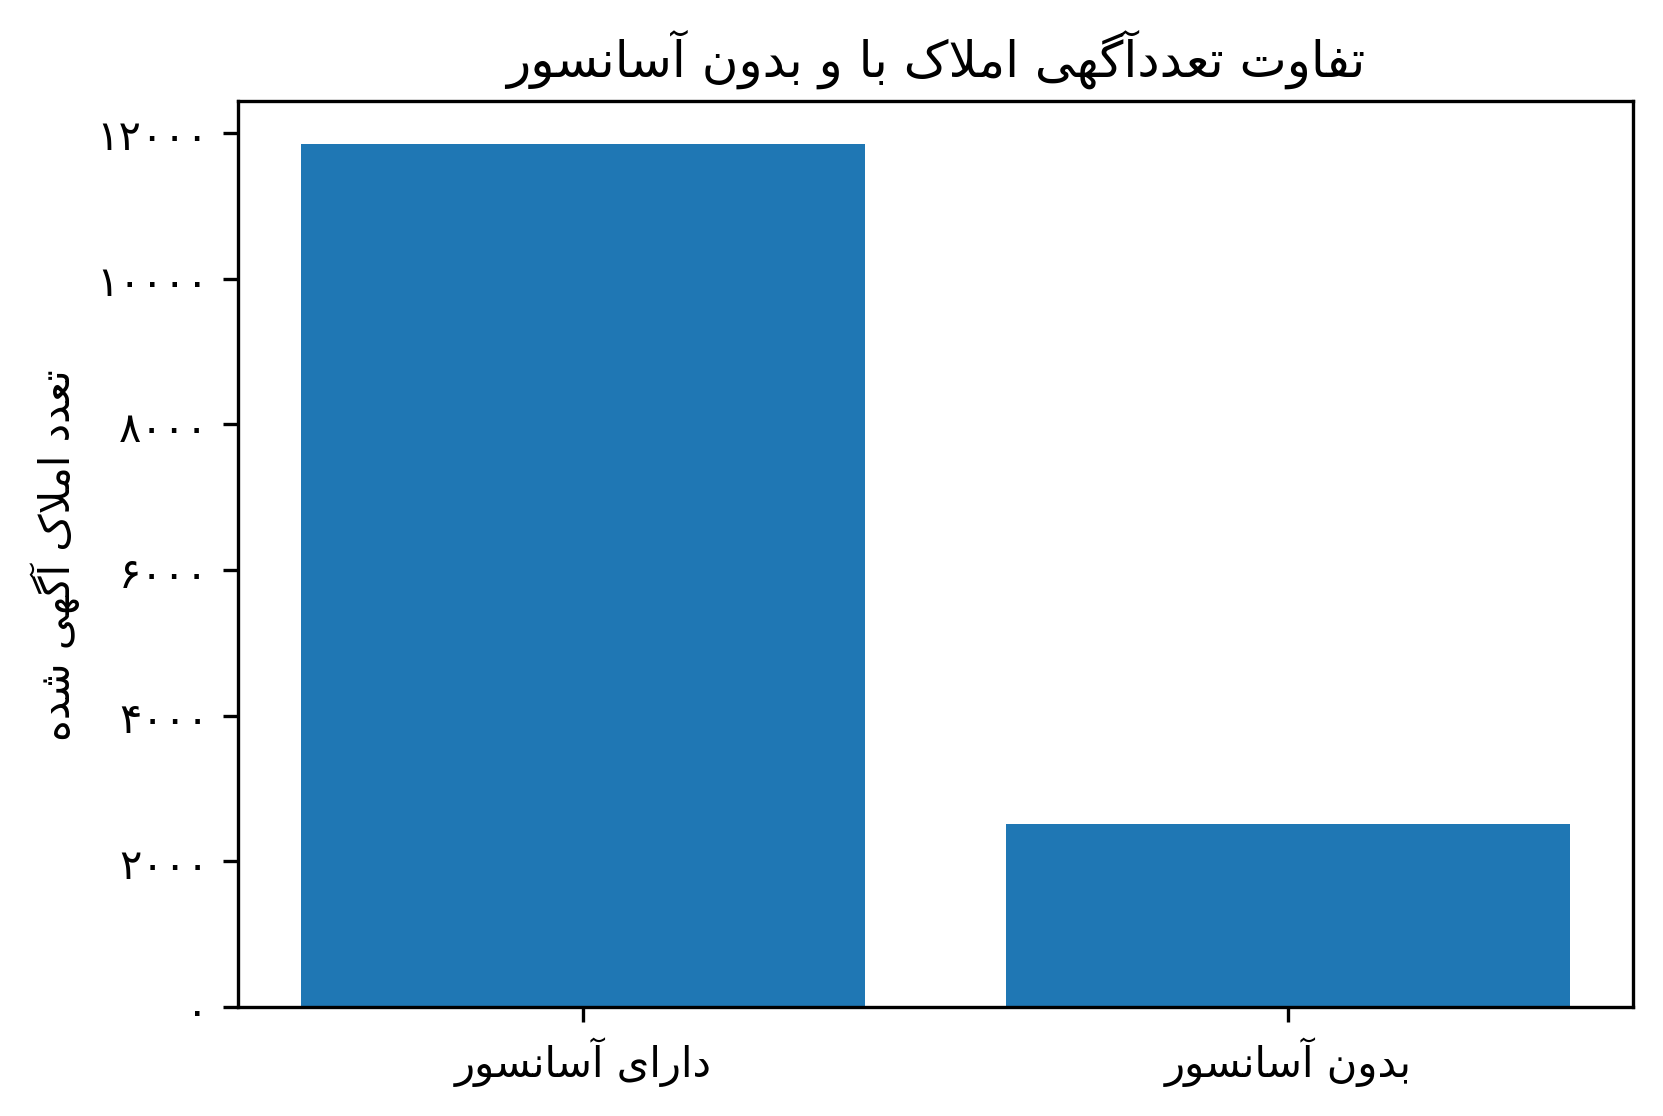

<Figure size 3000x900 with 0 Axes>

In [41]:

df=df[df["location"].isin(lo.keys())]
has_e=df[df["has_elevator"]==1]
has_n_e=df[df["has_elevator"]==0]

fig , ax =plt.subplots()
plt.figure(figsize=(10,3))
ax.bar(x=[per("دارای آسانسور"), per("بدون آسانسور")], height=[len(has_e),len(has_n_e)])
_=ax.set_yticklabels([number_to_per(int(i)) for i in ax.get_yticks()])
ax.set_title(per("تفاوت تعددآگهی املاک با و بدون آسانسور"))

ax.set_ylabel(per("تعدد املاک آگهی شده"))
# all of the locations


C:\Users\Thinkerman\AppData\Local\Temp\ipykernel_14796\1684023869.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  _=ax.set_yticklabels([number_to_per(i) for i in ax.get_yticks()])


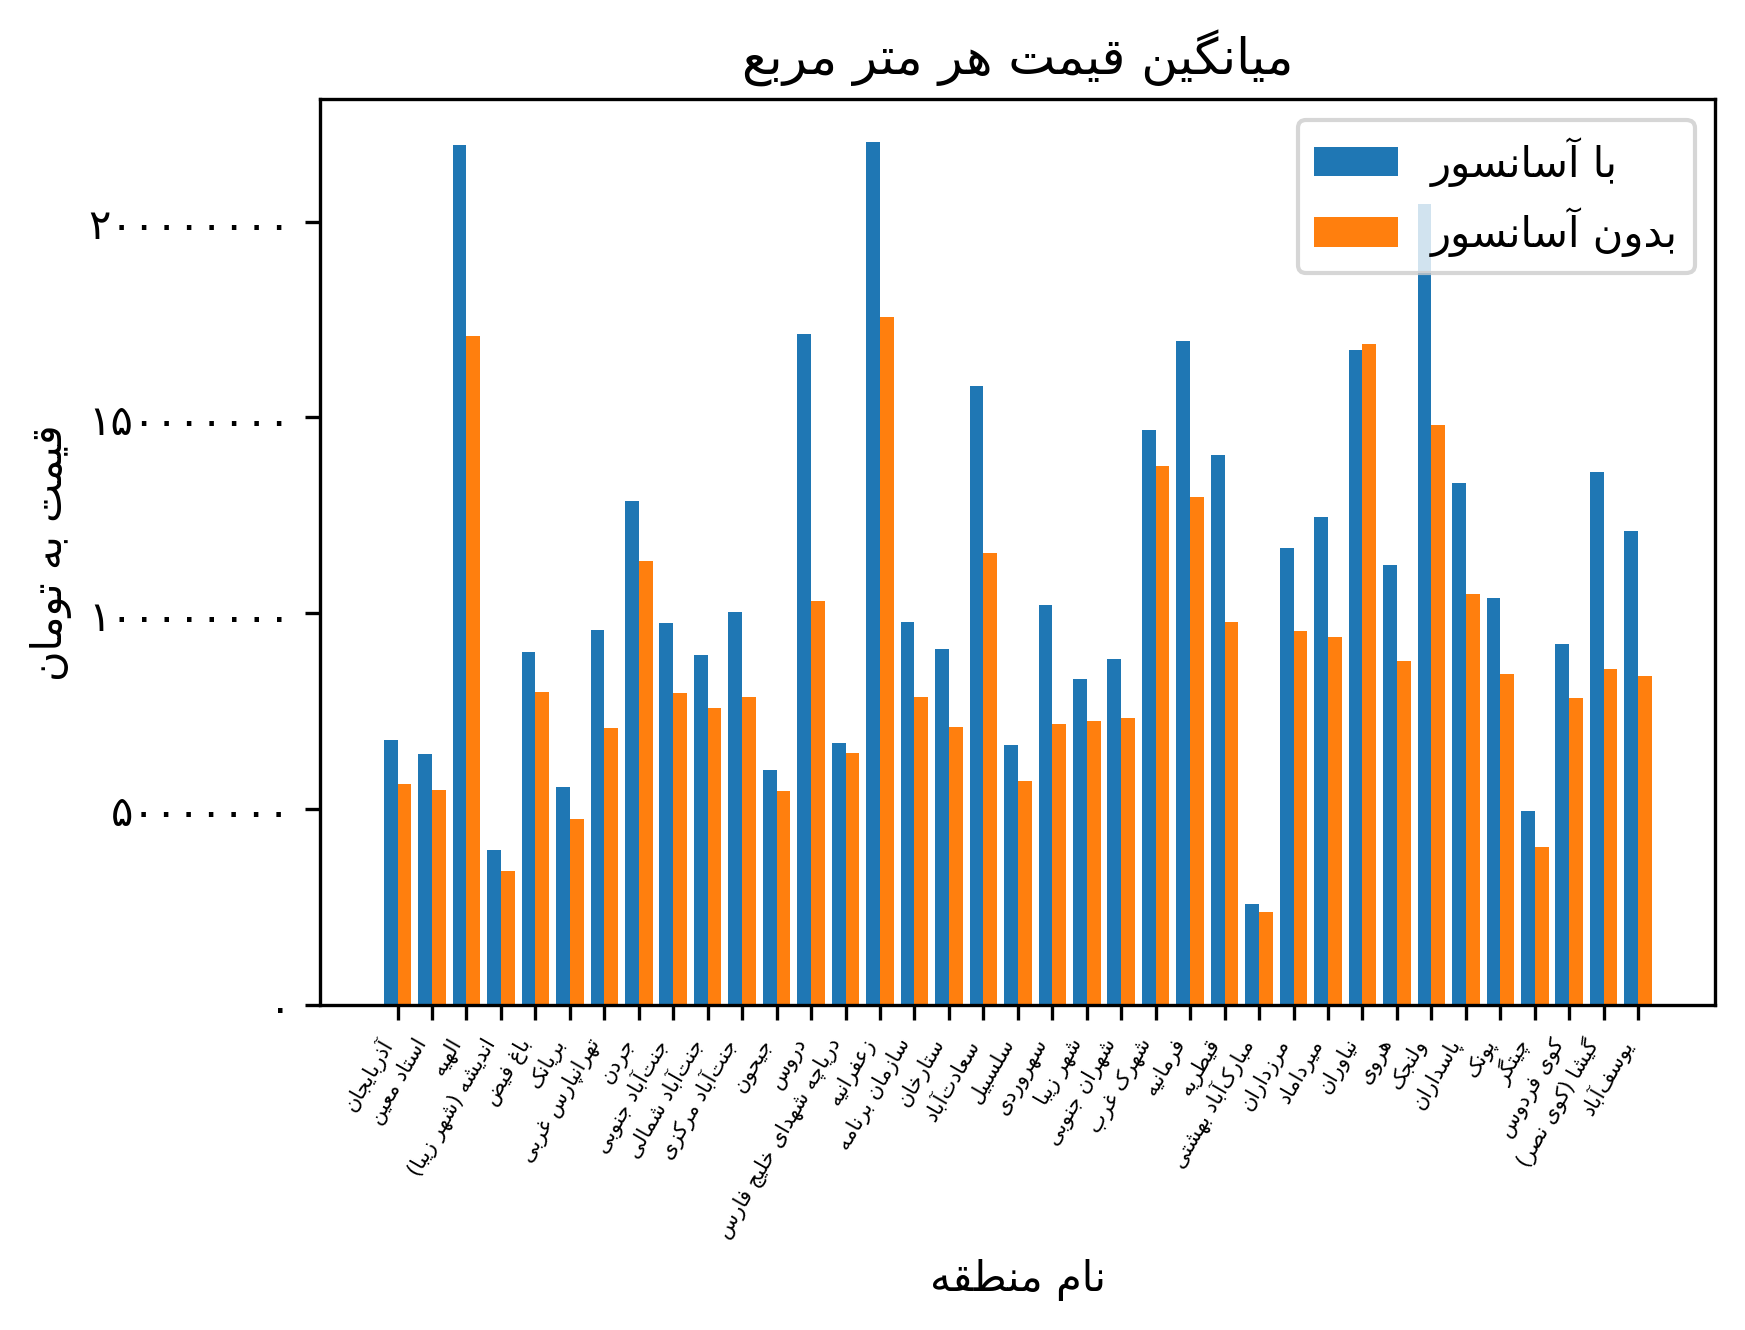

<Figure size 3000x1500 with 0 Axes>

In [43]:

df=df[df["location"].isin(lo.keys())]
has_e=df[df["has_elevator"]==1]
has_n_e=df[df["has_elevator"]==0]

locations=[per(i) for i in list(lo.keys())]

has_e[has_e["location"].isin(locations )]
has_n_e[has_n_e["location"].isin( locations)]

has_e=has_e[has_e["PPSM"]>1]
has_n_e=has_n_e[has_n_e["PPSM"]>1]

has_e_group=has_e.groupby(by="location").mean()
has_n_e_group=has_n_e.groupby(by="location").mean()




fig , ax = plt.subplots()
plt.figure(figsize=(10,5))
ax.xaxis.set_tick_params(labelsize=5)


y_e=has_e_group["PPSM"]
y_n_e=has_n_e_group["PPSM"]

x_loc=[per(i) for i in list(y_e.keys())]
xx=np.arange(len(x_loc))

ax.bar ( x=xx-0.2, height=y_e,align="center",width=0.4)
ax.bar ( x=xx+0.2, height=y_n_e,align="center",width=0.4)
ax.legend([per("با آسانسور"),per("بدون آسانسور")],)



_=ax.set_yticklabels([number_to_per(i) for i in ax.get_yticks()])
_=ax.set_xticks(xx)
_=ax.set_xticklabels(x_loc)
_=plt.setp(ax.get_xticklabels(), rotation=60, horizontalalignment='right')
_=ax.set_title(per("میانگین قیمت هر متر مربع"))
_=ax.set_ylabel(per("قیمت به تومان"))
_=ax.set_xlabel(per("نام منطقه"))


In [44]:

df=pd.concat([df,pd.DataFrame({"location":"زعفرانیه","PPSM":0,"has_parking":0},index=[100])])


C:\Users\Thinkerman\AppData\Local\Temp\ipykernel_14796\3932895958.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  _=ax.set_yticklabels([number_to_per(i) for i in ax.get_yticks()])


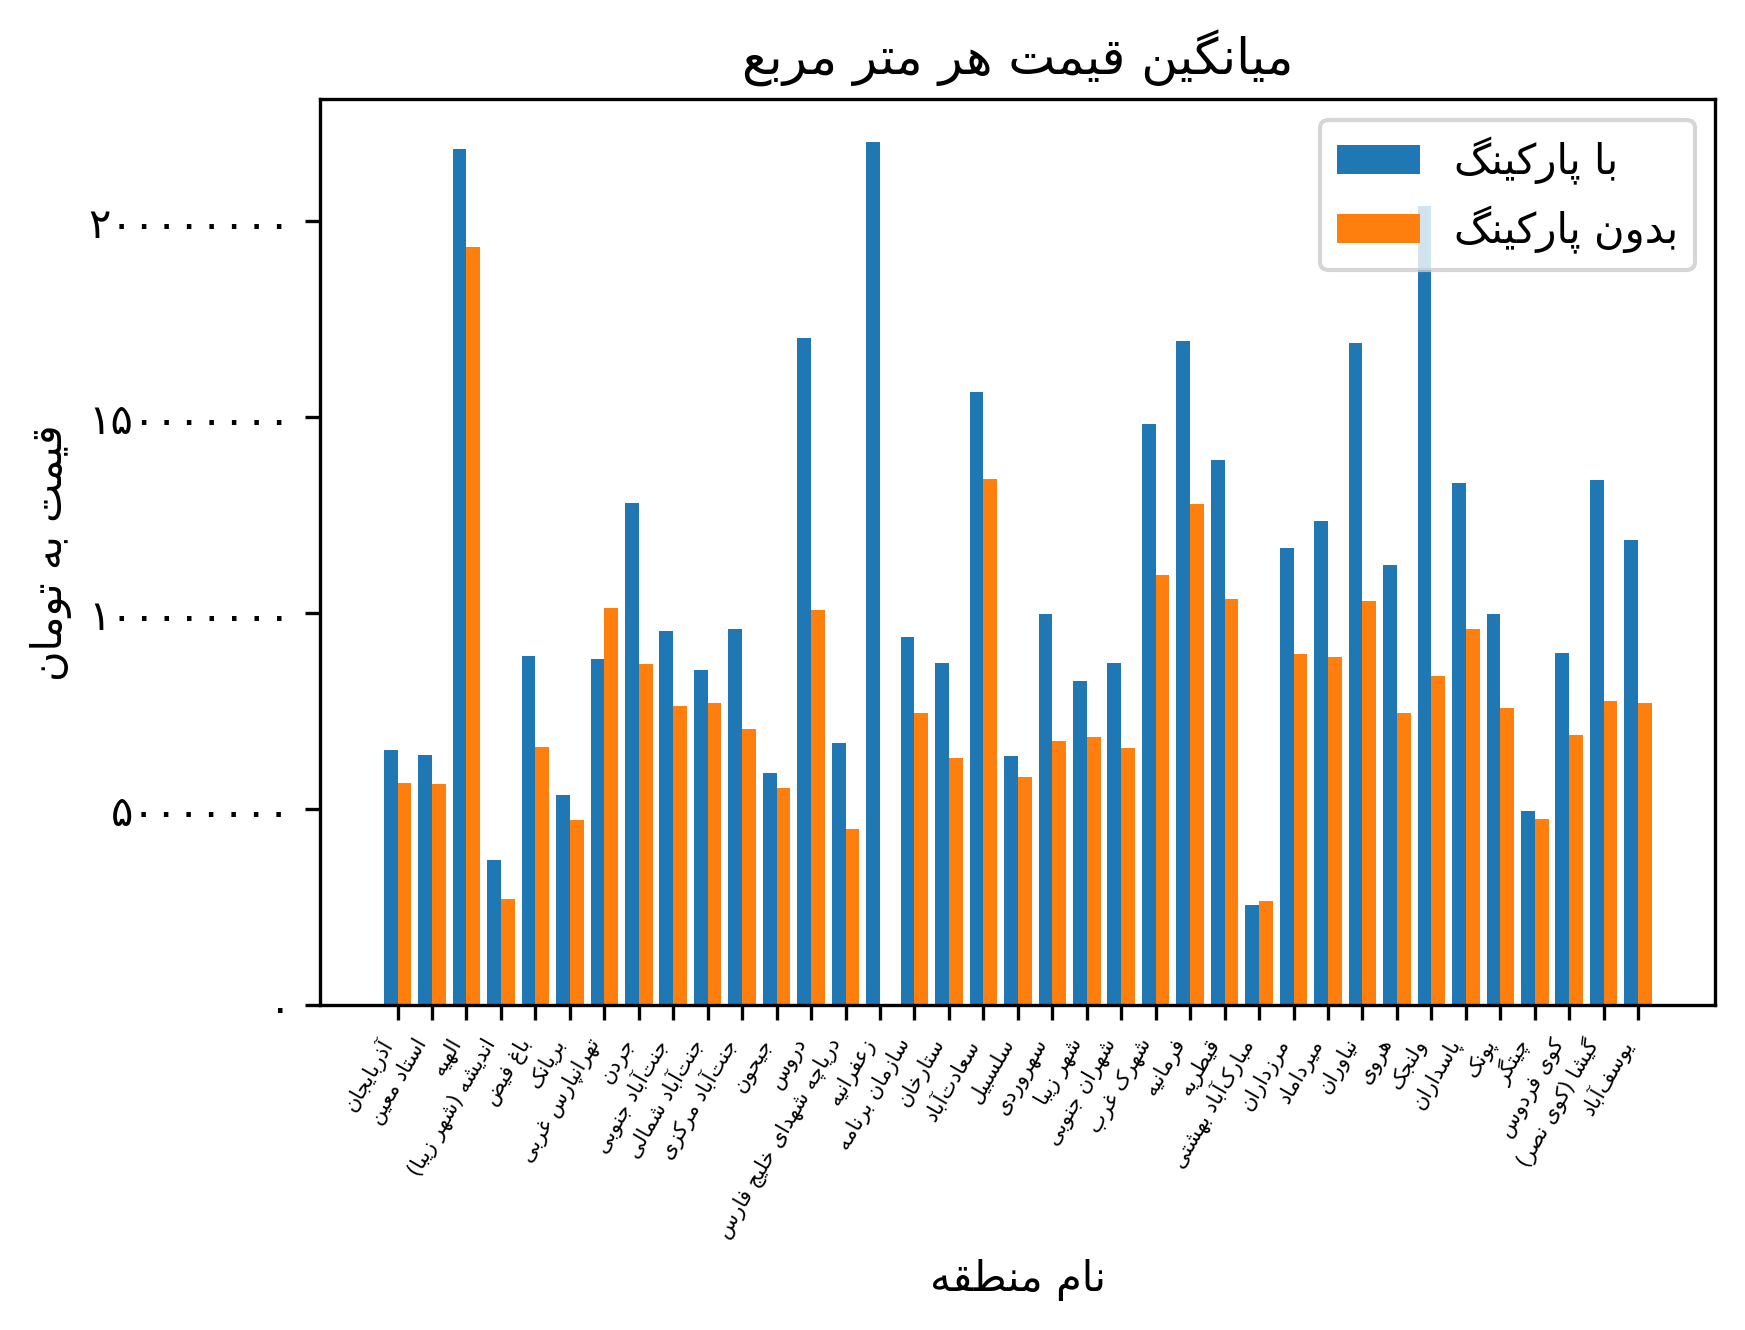

<Figure size 3000x1500 with 0 Axes>

In [46]:

df=df[df["location"].isin(lo.keys())]

has_e=df[df["has_parking"]==1]
has_n_e=df[df["has_parking"]==0]


locations=[per(i) for i in list(lo.keys())]

has_e[has_e["location"].isin(locations )]
has_n_e[has_n_e["location"].isin( locations)]

has_e=has_e[has_e["PPSM"]>=0]
has_n_e=has_n_e[has_n_e["PPSM"]>=0]

has_e_group=has_e.groupby(by="location").mean()
has_n_e_group=has_n_e.groupby(by="location").mean()


fig , ax = plt.subplots()
plt.figure(figsize=(10,5))
ax.xaxis.set_tick_params(labelsize=5)

y_e=has_e_group["PPSM"]
y_n_e=has_n_e_group["PPSM"]

x_loc=[per(i) for i in list(y_e.keys())]
xx=np.arange(len(x_loc))

ax.bar ( x=xx-0.2, height=y_e,align="center",width=0.4)
ax.bar ( x=xx+0.2, height=y_n_e,align="center",width=0.4)
ax.legend([per("با پارکینگ"),per("بدون پارکینگ")],)

_=ax.set_yticklabels([number_to_per(i) for i in ax.get_yticks()])
_=ax.set_xticks(xx)
_=ax.set_xticklabels(x_loc)
_=plt.setp(ax.get_xticklabels(), rotation=60, horizontalalignment='right')
_=ax.set_title(per("میانگین قیمت هر متر مربع"))
_=ax.set_ylabel(per("قیمت به تومان"))
_=ax.set_xlabel(per("نام منطقه"))


